In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gp
%matplotlib inline

In [108]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3956 # 6371 radius of earth in kilometers. Use 3956 for miles
    return c * r

In [133]:
df2 = pd.read_csv('file.csv')
df2 = df2.drop_duplicates('geoid')

In [76]:
df2.head()

,statefp,countyfp,tractce,geoid,name,namelsad,mtfcc,funcstat,aland,awater,intptlat,intptlon
0,39,021,010200,39021010200,102.0,Census Tract 102,G5020,S,254963980,1528641,40.1538168,-83.9647388
1,39,021,010500,39021010500,105.0,Census Tract 105,G5020,S,6985049,4584,40.1121978,-83.7257641
2,39,021,010400,39021010400,104.0,Census Tract 104,G5020,S,37288174,128056,40.1384153,-83.7873623
3,39,085,204302,39085204302,2043.02,Census Tract 2043.02,G5020,S,4108020,11929,41.7124067,-81.2575497
4,39,085,206600,39085206600,2066.0,Census Tract 2066,G5020,S,2637240,0,41.6488658,-81.455889


In [56]:
df3 = pd.read_csv('nhgis0004_ds201_20135_2013_tract.csv', dtype={'STATEA': object, 'COUNTYA': object, 'TRACTA': object})
df3['ID'] = df3.apply(lambda x: x.STATEA + x.COUNTYA + x.TRACTA, axis=1)

In [82]:
df = pd.merge(df2[['intptlat','intptlon','aland','geoid']], df3[['UEPE001','ID']], left_on='geoid', right_on='ID')
df.columns = ['lat','lon','area','tract','pop','tract2']

In [84]:
df.head()

,lat,lon,area,tract,pop,tract2
0,40.1538168,-83.9647388,254963980,39021010200,7174,39021010200
1,40.1121978,-83.7257641,6985049,39021010500,3945,39021010500
2,40.1384153,-83.7873623,37288174,39021010400,4160,39021010400
3,41.7124067,-81.2575497,4108020,39085204302,6727,39085204302
4,41.6488658,-81.455889,2637240,39085206600,4697,39085206600


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74000 entries, 0 to 73999
Data columns (total 6 columns):
lat       74000 non-null object
lon       74000 non-null object
area      74000 non-null object
tract     74000 non-null object
pop       74000 non-null int64
tract2    74000 non-null object
dtypes: int64(1), object(5)
memory usage: 4.0+ MB


In [107]:
df.area = df.area.apply(float)
df.lat = df.lat.apply(float)
df.lon = df.lon.apply(float)
df = df[df.area>0]
df['density'] = df.apply(lambda x: x['pop']/x['area']/3.86102e-7, axis=1)

In [138]:
import ggplot as gg
def plot(lat, lon, df, city):
    df['dist'] = df.apply(lambda x: haversine(lat, lon, x['lat'], x['lon']), axis=1)
    df = df[df['dist'] < 20].reset_index(drop=True)
    p = gg.ggplot(gg.aes(x='dist',y='density'), data = df)
    print (p+gg.stat_smooth(color='red')+gg.geom_point(alpha=0.5)+gg.ggtitle(city) + gg.xlab("People per square mile") + gg.ylab("Miles from city center"))

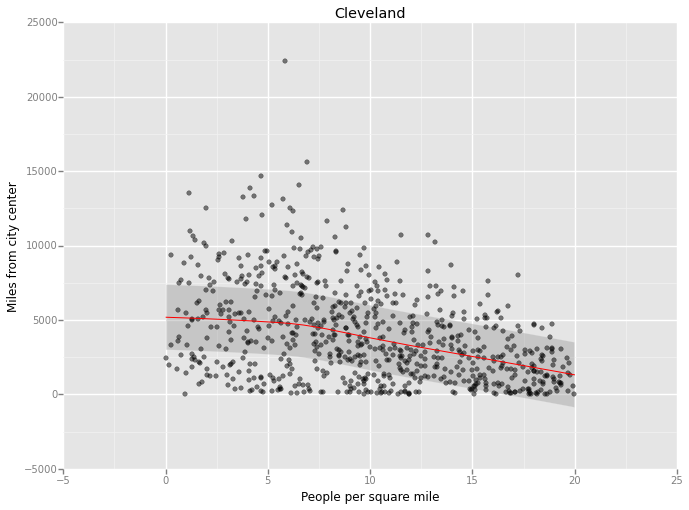

<ggplot: (290627229)>


In [139]:
plot(41.4997498,-81.6885114, df, 'Cleveland')

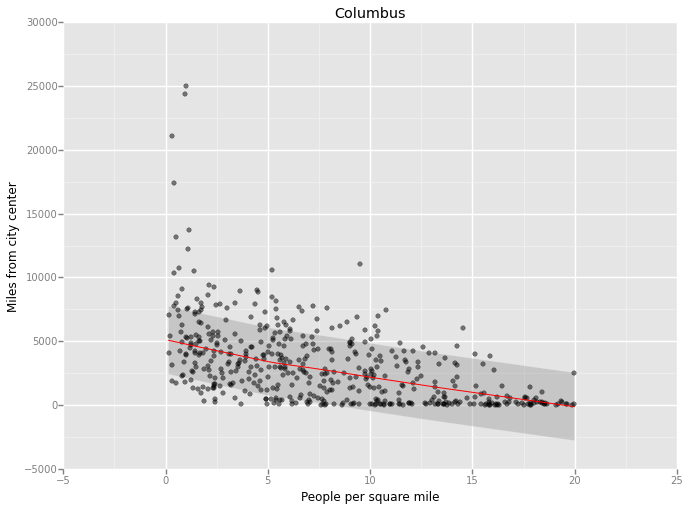

<ggplot: (293213145)>


In [140]:
plot(39.9636956,-82.9986181, df, 'Columbus')

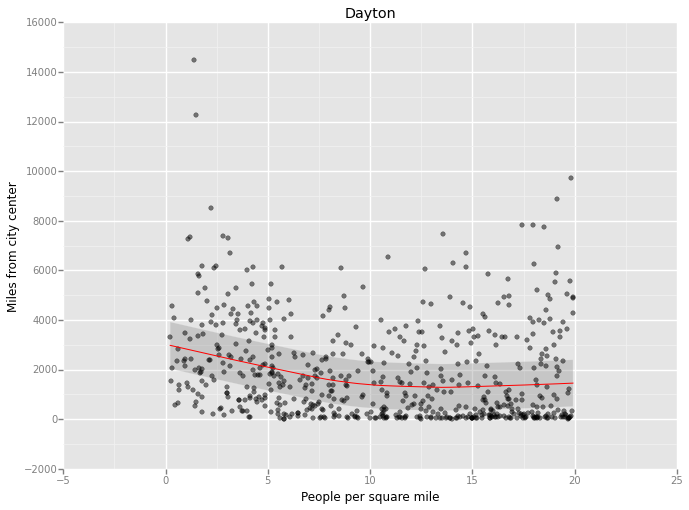

<ggplot: (301742309)>


In [141]:
plot(39.758511, -84.192373, df, 'Dayton')

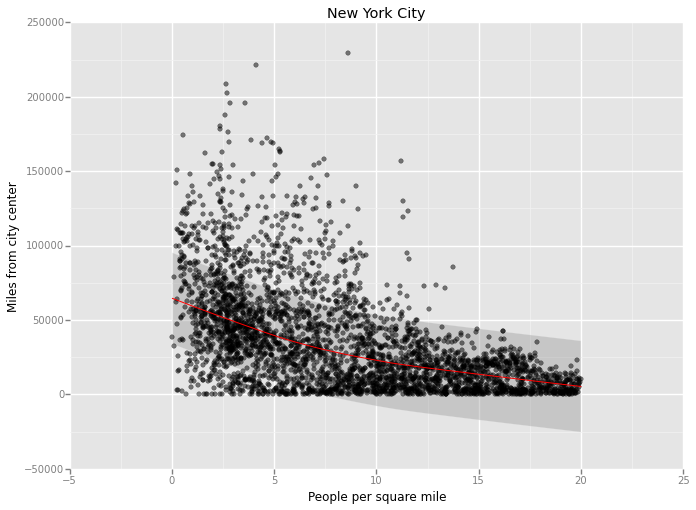

<ggplot: (293522017)>


In [142]:
plot(40.7414317,-73.9868908, df, 'New York City') 